# Assignment 3

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:
# 2) checking if the environmental variable exists
DFdata = os.getenv("DFDATA")
print (DFdata)


/gws/open/NYCOpenData/nycopendata/data


In [3]:
# getting the dataset from the data facility
df_oil_boilers = pd.read_csv(DFdata + "/jfzu-yy6n/1414245777/jfzu-yy6n")

# displaying the head of the table
df_oil_boilers.head(5)

,"Borough, Block and Lot #",Facility Address,Natural Gas Utility (Con Edison or National Grid,Building Manager,Owner,Owner Address,DEP Boiler Application #,Deadline for phasing out #6 oil (i.e. data of next DEP permit renewal after July 1 2012),Boiler Model,Number of identical boilers,...,Building Type,City Council District,Total area of buildings on lot,Number of buildings on property (tax lot),Number of floors,Number of residential units,Number of total units,Year constructed,Condominium housing?,Cooperative housing?
0,2.032590e+09,"2840 BAILEY AVENUE\nBronx, NY 10463\n(40.87433...",Con Edison,BESNIK REALTY CORP.,BESNIK REALTY CORP,"754 MACE AVENUE\nBRONX, NY 10467\n(40.86314421...",CA348086Y,7/6/05,ROCKMILLS MP 150,1.0,...,Elevator Apartments,14.0,86412.0,1.0,6.0,87.0,87.0,1926.0,,
1,2.057801e+09,"3900 GREYSTONE AVENUE\nBronx, NY 10463\n(40.88...",Con Edison,TROY PITTS SPRINT,"WIENER, EDITH","855 AVE\nMANHATTAN, NY 10001\n(40.750259021436...",CA014493L,7/6/05,FEDERAL FST-150,2.0,...,Elevator Apartments,11.0,134703.0,2.0,6.0,127.0,127.0,1928.0,,
2,2.028230e+09,"1650 GRAND\nBronx, NY 10457\n(40.8457983712978...",Con Edison,BRONX LEBANON HOSPITAL,BRONX-LEBANON HOSPITA,"1650 SELWYN AVE\nBRONX, NY 10457\n(40.84317219...",CA159489X,7/6/05,CLEAVER BROOKS CB-600-600,2.0,...,Elevator Apartments,14.0,480769.0,1.0,11.0,0.0,1.0,1941.0,,
3,2.030640e+09,"4422 3 AVENUE\nBronx, NY 10457\n(40.8540683145...",Con Edison,ST BARNABAS HOSPITAL BOILER ROOM,ST BARNABAS NURSING H,"4422 3 AVENUE\nN Y 10457\n(40.854068314549714,...",CB078401R,NaN,B & W FM 10-66,1.0,...,Loft Buildings,15.0,421234.0,4.0,8.0,0.0,1.0,1943.0,,
4,2.025060e+09,"1204 SHAKESPEARE AVENUE\nBronx, NY 10452\n(40....",Con Edison,BRAGREIS REALTY CORP.,BRAGREIS REALTY CORP,"191024 BROOKLYN\nNY 11219\n(40.63277295540763,...",CA352883Z,7/6/05,ROCKMILLS MP100,1.0,...,Walk-Up Apartments,16.0,53376.0,1.0,6.0,67.0,67.0,1926.0,,


In [4]:
# Since the table has 33 columns, and the head method didn't displaying all of them 
# Used .columns to display all the column names
columns = list(df_oil_boilers.columns)
columns

['Borough, Block and Lot #',
 'Facility Address',
 'Natural Gas Utility (Con Edison or National Grid',
 'Building Manager',
 'Owner',
 'Owner Address',
 'DEP Boiler Application #',
 'Deadline for phasing out #6 oil (i.e. data of next DEP permit renewal after July 1 2012)',
 'Boiler Model',
 'Number of identical boilers',
 'Boiler capacity (Gross BTU)',
 'Boiler Installation Date',
 'Estimated retirement date of boiler (assuming 35 year average useful life)',
 'Is boiler dual fuel capable?',
 'Age range of boiler',
 'Burner Model',
 'Primary Fuel',
 'Total Estimated Cosumption - High Estimate (Gallons) ',
 'Total Estimated Cosumption - Low Estimate (Gallons) ',
 'Total Estimated Cosumption - High Estimate (MMBTUs) ',
 'Total Estimated Cosumption - Low Estimate  (MMBTUs) ',
 'Needs to comply with Greener Greater Buildings Laws?',
 'Deadline for complying with Audit and Retrocommissioning Law',
 'Building Type',
 'City Council District',
 'Total area of buildings on lot',
 'Number of buil

In [6]:
# Dropping all the values except "Total area of buildings on lot" and 
# "Total Estimated Cosumption - High Estimate (Gallons)"

columns = list (df_oil_boilers.columns)
for i in range(len(columns)):
    if columns[i] == 'Total Estimated Cosumption - High Estimate (Gallons) ':
        pass
    elif columns[i] == 'Total area of buildings on lot':
        pass
    else: 
        df_oil_boilers.drop([columns[i]], axis=1, inplace=True)

# displaying the reducted dataframe        
df_oil_boilers.head(5)

,Total Estimated Cosumption - High Estimate (Gallons),Total area of buildings on lot
0,716160.0,86412.0
1,550000.0,134703.0
2,492750.0,480769.0
3,482040.0,421234.0
4,480000.0,53376.0


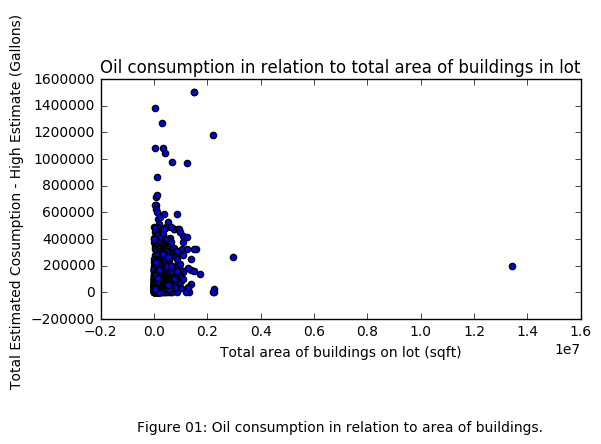

In [7]:
fig = plt.figure()
df_oil_boilers.plot.scatter("Total area of buildings on lot", "Total Estimated Cosumption - High Estimate (Gallons) ")
gca().set_position((.1, .3, .8, .6))
plt.title("Oil consumption in relation to total area of buildings in lot")
plt.figtext(0.16, 0.02, "Figure 01: Oil consumption in relation to area of buildings.")
plt.xlabel("Total area of buildings on lot (sqft)")